In [111]:
import pandas as pd
import os, re 
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
import seaborn as sns 

In [112]:
transformed_data_path = "formatted_output/transformed"

bpm_filt_data_path = "formatted_output/bpm_filtered"
bpm_filt_log_fpath = "{0}/bpm_filt_log.csv".format(bpm_filt_data_path)
pht_agg_log_fpath = "{0}/bpm1_agg_pht_log.csv".format(bpm_filt_data_path)
condensed_agg_log_fpath = "{0}/condensed_agg_pht_log.csv".format(bpm_filt_data_path)

bpm_filt_log_df = pd.read_csv(bpm_filt_log_fpath,index_col=0)
pht_agg_log_df = pd.read_csv(pht_agg_log_fpath,index_col=0)
condensed_agg_log_df = pd.read_csv(condensed_agg_log_fpath,index_col=0)
print("Pre-filtering:")
display(bpm_filt_log_df)
display(condensed_agg_log_df)

#Cecal contents only filtering 
cecal_filter = True 
if cecal_filter:
    cecal_bpm_filt_log_df = bpm_filt_log_df.loc[:,bpm_filt_log_df.columns.str.contains("cecal")]
    bpm_filt_log_df = cecal_bpm_filt_log_df
    
    cecal_condensed_agg_df = condensed_agg_log_df.loc[:,condensed_agg_log_df.columns.str.contains("cecal")]
    condensed_agg_log_df = cecal_condensed_agg_df

drop_prevotella = True 
if drop_prevotella:
    bpm_filt_log_df = bpm_filt_log_df.loc[~bpm_filt_log_df.index.str.contains(r'NBCBLOMG|NJCFFJJN'),:]
    condensed_agg_log_df = condensed_agg_log_df.loc[~condensed_agg_log_df.index.str.contains(r'Pst|Pco'),:]


feature_center = True
if feature_center:
    bpm_filt_log_df = bpm_filt_log_df.subtract(bpm_filt_log_df.mean(axis=1),axis=0)
    condensed_agg_log_df = condensed_agg_log_df.subtract(condensed_agg_log_df.mean(axis=1),axis=0)
    
assert(np.isclose(bpm_filt_log_df.mean(axis=1).sum(),0))
assert(np.isclose(condensed_agg_log_df.mean(axis=1).sum(),0))

#Convert so that samples are rows, features are columns (ie tranpose of previous data format)
data_tranpose = True 
if data_tranpose:
    if not bpm_filt_log_df.index.str.contains("cecal").sum():
        bpm_filt_log_df = bpm_filt_log_df.transpose()
    if not condensed_agg_log_df.index.str.contains("cecal").sum():
        condensed_agg_log_df = condensed_agg_log_df.transpose()
print("Post Filtering/Transpose")
display(bpm_filt_log_df)
display(condensed_agg_log_df)
        
        
print("==BPM=1 Transcripts STD==")        
display(bpm_filt_log_df.std(axis=0))
print("==BPM=1 Phenotypes STD==")        
display(condensed_agg_log_df.std(axis=0))

Pre-filtering:


,Pup_1.cecal_contents_53_1C_Pup_1,Pup_2.cecal_contents_53_1C_Pup_2,Pup_3.cecal_contents_53_1C_Pup_3,Pup_4.cecal_contents_53_1C_Pup_4,Pup_5.cecal_contents_53_1C_Pup_5,Pup_6.cecal_contents_53_1C_Pup_6,Pup_7.cecal_contents_53_1C_Pup_7,Pup_8.cecal_contents_53_1C_Pup_8,Pup_1.cecal_contents_54_2A_Pup_1,Pup_2.cecal_contents_54_2A_Pup_2,...,Pup_6.ileal_contents_53_1C_Pup_6,Pup_7.ileal_contents_53_1C_Pup_7,Pup_8.ileal_contents_53_1C_Pup_8,Pup_1.ileal_contents_54_2A_Pup_1,Pup_2.ileal_contents_54_2A_Pup_2,Pup_3.ileal_contents_54_2A_Pup_3,Pup_4.ileal_contents_54_2A_Pup_4,Pup_5.ileal_contents_54_2A_Pup_5,Pup_6.ileal_contents_54_2A_Pup_6,Pup_7.ileal_contents_54_2A_Pup_7
ANCJAENF_00439,8.445748,6.635825,9.597375,9.600254,9.043142,9.396107,9.300415,7.778145,-1.124545,9.072677,...,1.150959,1.518427,-0.645582,-1.003387,9.359455,0.350549,0.564357,5.109004,2.809229,2.203060
ANCJAENF_00416,10.039820,7.868867,10.958644,11.503063,10.961516,11.943150,10.982868,9.326984,1.506478,11.666761,...,2.828566,3.321529,2.629848,2.736667,12.032419,3.765638,4.529793,8.581182,3.214249,3.491108
ANCJAENF_00011,12.234154,8.556164,13.336950,12.434061,11.982321,12.973893,13.055375,12.471621,3.138090,12.400936,...,4.081640,4.147667,4.053631,2.161080,12.634867,3.681437,3.570458,7.129434,2.479332,2.766227
ANCJAENF_01852,9.858707,8.710833,10.868463,12.339941,12.090717,13.028880,10.811686,12.499719,2.624670,13.892816,...,2.839474,3.346477,3.686063,2.992304,13.177899,5.469962,5.576001,9.190402,4.672389,3.668616
ANCJAENF_02016,12.309322,9.536832,13.525981,13.387704,12.693286,13.386866,13.002205,12.171781,3.950406,14.331583,...,4.462250,4.830386,4.309298,3.641138,13.475535,5.715288,4.184252,9.804559,5.058028,5.296484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LDOIJNDB_01949,8.254668,8.216980,9.582110,9.137195,8.172098,8.537246,9.020149,9.577316,6.677211,10.917799,...,6.092466,5.374886,5.707102,7.976549,13.339574,7.787679,9.463787,10.889369,10.135471,10.052790
LDOIJNDB_00521,12.420624,13.288833,14.226192,14.823334,13.312892,14.431389,14.367601,14.120646,10.197773,15.343569,...,8.626853,9.474685,9.893955,10.775725,16.838419,10.016304,11.082298,13.214036,12.300464,11.702182
LDOIJNDB_00521,12.420624,13.288833,14.226192,14.823334,13.312892,14.431389,14.367601,14.120646,10.197773,15.343569,...,8.626853,9.474685,9.893955,10.775725,16.838419,10.016304,11.082298,13.214036,12.300464,11.702182
LDOIJNDB_01036,6.572223,7.460558,8.115310,8.043741,7.118845,8.011644,8.423199,8.347219,3.954605,9.684013,...,2.980463,4.058002,4.311057,6.056703,11.504614,5.778538,7.357904,8.311653,7.762973,7.612148


,Pup_1.cecal_contents_53_1C_Pup_1,Pup_2.cecal_contents_53_1C_Pup_2,Pup_3.cecal_contents_53_1C_Pup_3,Pup_4.cecal_contents_53_1C_Pup_4,Pup_5.cecal_contents_53_1C_Pup_5,Pup_6.cecal_contents_53_1C_Pup_6,Pup_7.cecal_contents_53_1C_Pup_7,Pup_8.cecal_contents_53_1C_Pup_8,Pup_1.cecal_contents_54_2A_Pup_1,Pup_2.cecal_contents_54_2A_Pup_2,...,Pup_6.ileal_contents_53_1C_Pup_6,Pup_7.ileal_contents_53_1C_Pup_7,Pup_8.ileal_contents_53_1C_Pup_8,Pup_1.ileal_contents_54_2A_Pup_1,Pup_2.ileal_contents_54_2A_Pup_2,Pup_3.ileal_contents_54_2A_Pup_3,Pup_4.ileal_contents_54_2A_Pup_4,Pup_5.ileal_contents_54_2A_Pup_5,Pup_6.ileal_contents_54_2A_Pup_6,Pup_7.ileal_contents_54_2A_Pup_7
Bbr_Glc,8.445748,6.635825,9.597375,9.600254,9.043142,9.396107,9.300415,7.778145,-1.124545,9.072677,...,1.150959,1.518427,-0.645582,-1.003387,9.359455,0.350549,0.564357,5.109004,2.809229,2.203060
Bbr_Fuc,10.039820,7.868867,10.958644,11.503063,10.961516,11.943150,10.982868,9.326984,1.506478,11.666761,...,2.828566,3.321529,2.629848,2.736667,12.032419,3.765638,4.529793,8.581182,3.214249,3.491108
Bbr_Mal,11.467394,8.934610,12.577131,12.720568,12.255441,13.129880,12.289755,12.381040,3.237722,13.541778,...,3.794455,4.108177,4.016331,2.931507,13.096100,4.955562,4.443570,8.708132,4.069917,3.910442
Bbr_Lnb,9.491393,5.852265,10.725719,10.292813,9.608248,10.330876,9.848454,9.234801,0.957145,10.672960,...,2.737378,4.199039,2.766139,1.004368,11.766635,4.008039,1.722629,9.159853,4.107304,3.240586
Bbr_GOS,8.763832,6.578009,10.015347,10.126221,9.268100,10.506129,9.429787,8.811926,2.968827,14.137581,...,2.492484,2.592684,1.483874,2.744602,13.422739,4.467046,2.431093,8.741565,4.220949,4.139025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spa_Acetate,9.101540,8.760641,10.463021,8.862486,8.818797,8.329923,10.387810,10.699098,6.612821,10.711489,...,4.615338,5.804169,5.123833,7.088806,12.190603,6.530291,7.464703,8.839654,8.536720,7.807043
Spa_Formate,9.635553,10.051356,11.475442,10.260067,9.922487,10.018547,11.271825,11.765872,7.257920,12.871561,...,5.502500,6.782826,6.541069,8.230077,13.913109,7.283921,7.640244,10.208547,9.550785,8.830297
Spa_L-Lactate,8.254668,8.216980,9.582110,9.137195,8.172098,8.537246,9.020149,9.577316,6.677211,10.917799,...,6.092466,5.374886,5.707102,7.976549,13.339574,7.787679,9.463787,10.889369,10.135471,10.052790
Spa_Ethanol,10.471157,11.346075,12.189231,12.563470,11.248209,12.291474,12.386134,12.196170,8.116717,13.457050,...,6.744723,7.669124,8.032989,9.202718,15.060484,8.603715,9.840834,11.579909,10.787967,10.338837


Post Filtering/Transpose


,ANCJAENF_00439,ANCJAENF_00416,ANCJAENF_00011,ANCJAENF_01852,ANCJAENF_02016,ANCJAENF_00287,ANCJAENF_01473,ANCJAENF_01475,ANCJAENF_01476,ANCJAENF_00928,...,LDOIJNDB_01767,LDOIJNDB_00635,LDOIJNDB_02060,LDOIJNDB_01022,LDOIJNDB_01273,LDOIJNDB_01949,LDOIJNDB_00521,LDOIJNDB_00521,LDOIJNDB_01036,LDOIJNDB_00003
Pup_1.cecal_contents_53_1C_Pup_1,2.331380,1.532395,3.079852,0.578373,1.823783,1.459700,0.087860,0.474203,0.601192,-0.976857,...,-0.826687,-0.833960,-0.309868,-1.269616,-0.868734,-1.120397,-1.460452,-1.460452,-1.184146,-1.152601
Pup_2.cecal_contents_53_1C_Pup_2,0.521456,-0.638559,-0.598137,-0.569501,-0.948707,-2.179429,-2.351316,-1.385750,-1.657149,-0.659500,...,-1.944179,-0.763644,-1.061980,-0.434966,-0.871779,-1.158086,-0.592242,-0.592242,-0.295811,-0.505364
Pup_3.cecal_contents_53_1C_Pup_3,3.483006,2.451219,4.182648,1.588130,3.040442,2.694025,1.802822,1.423861,1.691119,0.041221,...,0.865158,0.764697,0.814438,0.638808,0.902620,0.207045,0.345116,0.345116,0.358941,1.049583
Pup_4.cecal_contents_53_1C_Pup_4,3.485885,2.995638,3.279759,3.059607,2.902165,2.261119,1.622447,1.584658,2.043319,0.766109,...,-1.862807,-0.310799,-1.311137,-0.037071,-0.852253,-0.237871,0.942258,0.942258,0.287373,0.531574
Pup_5.cecal_contents_53_1C_Pup_5,2.928774,2.454091,2.828019,2.810383,2.207747,1.576554,0.502647,0.821359,1.352053,-0.272988,...,-0.491029,-0.703375,-1.005937,-0.881360,-0.683124,-1.202967,-0.568184,-0.568184,-0.637524,-0.787412
Pup_6.cecal_contents_53_1C_Pup_6,3.281739,3.435725,3.819592,3.748546,2.901327,2.299183,2.197090,2.042827,2.150228,0.626744,...,-1.475489,-0.866242,-1.820820,-0.180778,-1.191585,-0.837819,0.550314,0.550314,0.255276,0.138352
Pup_7.cecal_contents_53_1C_Pup_7,3.186047,2.475443,3.901073,1.531353,2.516666,1.816760,0.953007,0.848468,1.359645,0.377501,...,0.388432,0.806826,0.621887,0.504977,0.629216,-0.354917,0.486525,0.486525,0.666831,0.798602
Pup_8.cecal_contents_53_1C_Pup_8,1.663777,0.819559,3.317319,3.219385,1.686242,1.203107,0.765374,0.174024,0.368139,0.345577,...,0.807186,1.183888,0.867400,1.003777,1.118510,0.202251,0.239570,0.239570,0.590851,0.962880
Pup_1.cecal_contents_54_2A_Pup_1,-7.238913,-7.000948,-6.016211,-6.655663,-6.535132,-7.074548,-5.841479,-5.760665,-4.619615,-1.804471,...,-2.698407,-3.391871,-2.729394,-3.430626,-3.462990,-2.697854,-3.683303,-3.683303,-3.801764,-3.635951
Pup_2.cecal_contents_54_2A_Pup_2,2.958308,3.159336,3.246634,4.612482,3.846044,2.641266,6.602762,5.906653,4.775088,0.398760,...,1.017388,1.279669,0.796402,2.625044,1.708620,1.542734,1.462494,1.462494,1.927644,2.242395


,Bbr_Glc,Bbr_Fuc,Bbr_Mal,Bbr_Lnb,Bbr_GOS,Bbr_Trp,Bbr_Formate,Bbr_Ethanol,Bca_Glc,Bca_Ara,...,Spa_Chor,Spa_Pro,Spa_Asp,Spa_B3,Spa_B9,Spa_Acetate,Spa_Formate,Spa_L-Lactate,Spa_Ethanol,Spa_CA_d
Pup_1.cecal_contents_53_1C_Pup_1,2.331380,1.532395,1.827336,1.459700,0.387752,-0.976857,2.230031,2.677821,2.416436,1.298316,...,-0.896052,-0.804865,-0.906241,-0.552065,-0.826687,-0.571914,-1.069175,-1.120397,-1.368350,-1.152601
Pup_2.cecal_contents_53_1C_Pup_2,0.521456,-0.638559,-0.705448,-2.179429,-1.798071,-0.659500,0.089073,0.126534,1.974309,1.297520,...,-1.332147,-0.675767,-0.613324,-1.728078,-1.944179,-0.912812,-0.653373,-1.158086,-0.493432,-0.505364
Pup_3.cecal_contents_53_1C_Pup_3,3.483006,2.451219,2.937073,2.694025,1.639267,0.041221,3.556549,3.848737,6.024275,5.764415,...,0.650120,0.819067,0.581594,1.174022,0.865158,0.789568,0.770714,0.207045,0.349725,1.049583
Pup_4.cecal_contents_53_1C_Pup_4,3.485885,2.995638,3.080510,2.261119,1.750141,0.766109,3.368951,3.485255,5.218496,4.556766,...,-0.785023,-0.126238,0.057829,-1.696707,-1.862807,-0.810968,-0.444662,-0.237871,0.723963,0.531574
Pup_5.cecal_contents_53_1C_Pup_5,2.928774,2.454091,2.615383,1.576554,0.892020,-0.272988,2.880387,3.143868,5.194715,5.024257,...,-0.852862,-0.734417,-0.693328,-0.644469,-0.491029,-0.854656,-0.782242,-1.202967,-0.591297,-0.787412
Pup_6.cecal_contents_53_1C_Pup_6,3.281739,3.435725,3.489822,2.299183,2.130049,0.626744,3.231542,2.513418,5.090906,4.626852,...,-1.137106,0.289422,-0.298346,-2.846416,-1.475489,-1.343531,-0.686181,-0.837819,0.451968,0.138352
Pup_7.cecal_contents_53_1C_Pup_7,3.186047,2.475443,2.649697,1.816760,1.053707,0.377501,3.104989,3.381517,6.054653,5.792612,...,0.460909,0.966837,0.656244,0.194913,0.388432,0.714356,0.567096,-0.354917,0.546627,0.798602
Pup_8.cecal_contents_53_1C_Pup_8,1.663777,0.819559,2.740982,1.203107,0.435846,0.345577,1.478784,1.718838,3.487622,4.263206,...,0.339835,0.767157,1.268927,0.793026,0.807186,1.025644,1.061143,0.202251,0.356664,0.962880
Pup_1.cecal_contents_54_2A_Pup_1,-7.238913,-7.000948,-6.402336,-7.074548,-5.407253,-1.804471,-6.148883,-7.400940,-7.543903,-6.193834,...,-3.420337,-4.097757,-3.967591,-3.355765,-2.698407,-3.060633,-3.446808,-2.697854,-3.722790,-3.635951
Pup_2.cecal_contents_54_2A_Pup_2,2.958308,3.159336,3.901720,2.641266,5.761501,0.398760,1.887946,2.786894,6.337358,4.014636,...,1.061455,1.667980,1.390911,1.632830,1.017388,1.038035,2.166832,1.542734,1.617544,2.242395


==BPM=1 Transcripts STD==


ANCJAENF_00439    4.130072
ANCJAENF_00416    3.482851
ANCJAENF_00011    4.346268
ANCJAENF_01852    3.864389
ANCJAENF_02016    3.669111
                    ...   
LDOIJNDB_01949    1.364641
LDOIJNDB_00521    1.432725
LDOIJNDB_00521    1.432725
LDOIJNDB_01036    1.393349
LDOIJNDB_00003    1.439324
Length: 1497, dtype: float64

==BPM=1 Phenotypes STD==


Bbr_Glc          4.130072
Bbr_Fuc          3.482851
Bbr_Mal          3.900422
Bbr_Lnb          3.511907
Bbr_GOS          3.557372
                   ...   
Spa_Acetate      1.333509
Spa_Formate      1.433530
Spa_L-Lactate    1.364641
Spa_Ethanol      1.412212
Spa_CA_d         1.439324
Length: 314, dtype: float64

From np.linalag.svd:
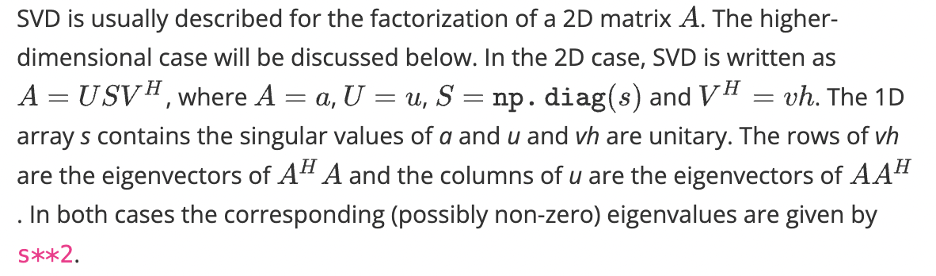

In [113]:
def sv_projections(feature_df,u,s,vh,pc_indices=[0,1],axis=0):
    """Return projections of feature_df onto singular vectors specified by axis 
        feature_df: samples (index) x features (columns)
        u: Matrix of left singular vectors (columns) - n_samples x n_samples
        s: singular values (vector) 
        vh: Matrix of right singular vectors (columns) - n_features x n_features
        pc_indices: list-like of indicies for which singular vectors to generate projections on  
        axis: 0 or 1, for generating sample projections or feature projections respectively 
    """
    #Generate PCs, a len(pc_indices) x {n_samples or n_features} ndarray representing the PCs specified 
    #by pc_indices and axis
    if axis == 0: #sample projections 
        SVs = vh[pc_indices,:]# n_PCs x n_features 
        data = feature_df.values.transpose() #n_features x n_samples
        assert(SVs.shape[1] == data.shape[0])
    elif axis == 1: #feature projections
        SVs = u[:,pc_indices].transpose() #n_PCs x n_samples
        data = feature_df.values #n_samples x n_features 
        assert(SVs.shape[1] == data.shape[0])
    else: 
        raise ValueError("axis must be 0 (sample projections) or 1 (feature projections)")
    #projections = PCs * data
    projections = np.dot(SVs,data)
    return projections
    
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


sklearn.PCA explained variance: [0.88122099 0.05033897]


method name               PERMANOVA
test statistic name        pseudo-F
sample size                      15
number of groups                  2
test statistic            26.692574
p-value                     0.00149
number of permutations       100000
Name: PERMANOVA results, dtype: object

,RSV1,RSV2,arm
0,-72.837807,-20.089542,1C
1,-60.608133,-20.294954,1C
2,-85.605139,9.491319,1C
3,-76.567234,-8.893324,1C
4,-82.568599,-10.498453,1C
5,-62.628689,-4.130156,1C
6,-92.393197,11.714063,1C
7,-64.683018,-5.592713,1C
8,126.465311,-53.467000,2A
9,-95.598908,33.783159,2A


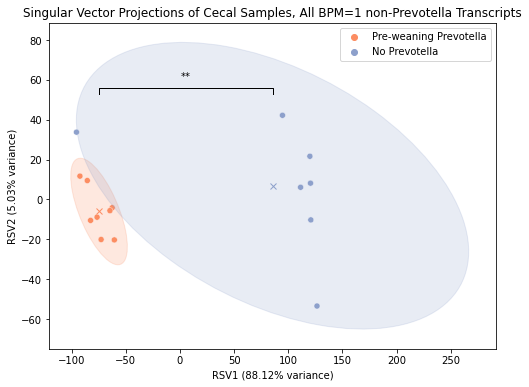

In [114]:
#SVD using log transformed transcript data, BPM1 filtered, non-aggregated
"""
"""
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

from sklearn.decomposition import PCA
from numpy.linalg import svd 

u,s,vh = svd(bpm_filt_log_df) ##BPM1 filtered transcripts 
#Explained variance calculated from s -> eigenvalues 
eigenvalues = s**2/(len(s)-1)
expl_variance = eigenvalues / np.sum(eigenvalues)

#Sanity check PCA, assert that explained variance isclose  
pca = PCA(n_components=2)
pca.fit(bpm_filt_log_df)
print("sklearn.PCA explained variance: {0}".format(pca.explained_variance_ratio_))
assert(np.isclose(expl_variance[0],pca.explained_variance_ratio_[0]))
assert(np.isclose(expl_variance[1],pca.explained_variance_ratio_[1]))

#Sample and Feature projections
pc_indices = [0,1]
sample_projections = sv_projections(bpm_filt_log_df,u,s,vh,pc_indices=pc_indices)
feature_projections = sv_projections(bpm_filt_log_df,u,s,vh,axis=1,pc_indices=pc_indices)
sample_proj_df = pd.DataFrame(data=sample_projections.T,columns=["RSV1","RSV2"])
sample_proj_df.loc[:,"arm"] = ["1C"]*8 + ["2A"]*7

#PERMANOVA on SV1/SV2 sample projections of data 
from scipy.spatial import distance_matrix
from skbio.stats import distance as sk_distance 
v1 = sample_projections.T #M vectors in K dimensions = n_samples x n_PCs
#permanova requires a skbio.stats.distance.DistanceMatrix object, must convert output  
sp_dm = sk_distance.DistanceMatrix(distance_matrix(v1,v1,p=2))

skpa = sk_distance.permanova(distance_matrix=sp_dm,grouping=sample_proj_df["arm"],permutations=100000)
display(skpa)

if skpa["p-value"] < 0.0001: 
    sig_str = "****"
elif skpa["p-value"] < 0.001: 
    sig_str = "***"
elif skpa["p-value"] < 0.01: 
    sig_str = "**"
elif skpa["p-value"] < 0.05: 
    sig_str = "*"
else:
    sig_str = "ns"


display(sample_proj_df)
fig,ax = plt.subplots(1,1,figsize=(8,6))
palette = sns.color_palette("Set2")[1:3]
sns.scatterplot(data=sample_proj_df,x="RSV1",y="RSV2",hue="arm",palette=palette)
ax.set_xlabel("RSV{0} ({1}% variance)".format(pc_indices[0]+1,
                                              "%.2f" % (expl_variance[pc_indices[0]]*100)))
ax.set_ylabel("RSV{0} ({1}% variance)".format(pc_indices[1]+1,
                                              "%.2f" % (expl_variance[pc_indices[1]]*100)))
#Relabel legend with full study arm descriptions
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["Pre-weaning Prevotella","No Prevotella"])
ax.set_title("Singular Vector Projections of Cecal Samples, All BPM=1 non-Prevotella Transcripts")
#Get sample projections subsetted by arm (1C vs 2A), as well as cluster centers for arm
sample_proj_1C = sample_proj_df.loc[sample_proj_df["arm"] == "1C",:]
center_1C_x, center_1C_y = np.mean(sample_proj_1C["RSV1"]),np.mean(sample_proj_1C["RSV2"])
sample_proj_2A  = sample_proj_df.loc[sample_proj_df["arm"] == "2A",:]
center_2A_x, center_2A_y = np.mean(sample_proj_2A["RSV1"]),np.mean(sample_proj_2A["RSV2"])
#Cluster center markers 
ax.plot(center_1C_x,center_1C_y,c=palette[0],marker='x')
ax.plot(center_2A_x,center_2A_y,c=palette[1],marker='x')
#Confidence ellipses around each cluster - TODO: adjust n_std to correspond to 95% confidence in 2D (1D equiv of .975)
confidence_ellipse(x=sample_proj_1C["RSV1"],y=sample_proj_1C["RSV2"],ax=ax,n_std=2.25,
                   edgecolor=palette[0],facecolor=palette[0],alpha=0.2)
confidence_ellipse(x=sample_proj_2A["RSV1"],y=sample_proj_2A["RSV2"],ax=ax,n_std=2.25,
                   edgecolor=palette[1],facecolor=palette[1],alpha=0.2)
#Significance bracket: x1, x2 = cluster centers (x); y2 = bar y position, y1 = bracket extent 
x1, x2 = center_1C_x, center_2A_x
# y1, y2 = 22, 25 #Hard-coded, fix me 
ymin, ymax = ax.get_ylim()
y2 = ymax - (ymax-ymin)*.2
y1 = y2-(ymax-ymin)*.02
plt.text((x1+x2)*.5, y2+3, sig_str, ha='center', va='bottom', color='k')
plt.plot([x1,x1, x2, x2], [y1, y2, y2, y1], linewidth=1, color='k')

plt.savefig("figures/bpm1_transcripts_SVD.png", dpi=200, facecolor='w',bbox_inches="tight")
# plt.scatter(feature_projections[0,:],feature_projections[1,:])




sklearn.PCA explained variance: [0.87027742 0.0645283 ]


,RSV1,RSV2,arm
0,-32.080571,-9.284583,1C
1,-28.614821,-8.863024,1C
2,-41.278190,4.091379,1C
3,-37.107834,-2.928808,1C
4,-37.882534,-6.174281,1C
5,-33.037911,1.164329,1C
6,-41.780566,1.950858,1C
7,-32.268162,-0.635197,1C
8,61.631177,-26.048181,2A
9,-43.027906,9.194170,2A


method name               PERMANOVA
test statistic name        pseudo-F
sample size                      15
number of groups                  2
test statistic            25.762256
p-value                     0.00131
number of permutations       100000
Name: PERMANOVA results, dtype: object

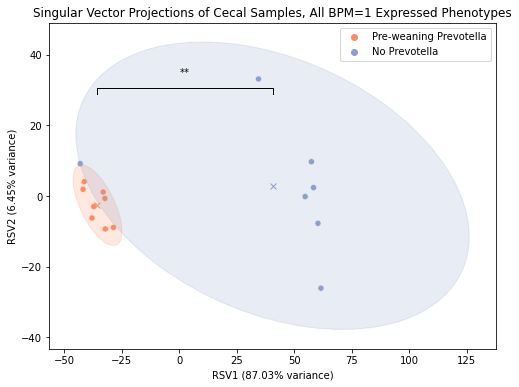

In [115]:
#SVD using log transformed transcript data, BPM=1 filtered, phenotype aggregated  

condensed_agg_log_df_nonna = condensed_agg_log_df.dropna(inplace=True)
# display(condensed_agg_log_df)
u,s,vh = svd(condensed_agg_log_df,full_matrices=True)
#Explained variance calculated from s -> eigenvalues 
eigenvalues = s**2/(len(s)-1)
expl_variance = eigenvalues / np.sum(eigenvalues)
# print(expl_variance)
#Sanity check PCA, assert that explained variance isclose  
pca = PCA(n_components=2)
pca.fit(condensed_agg_log_df)
print("sklearn.PCA explained variance: {0}".format(pca.explained_variance_ratio_))
assert(np.isclose(expl_variance[0],pca.explained_variance_ratio_[0]))
assert(np.isclose(expl_variance[1],pca.explained_variance_ratio_[1]))

#Sample and Feature projections
pc_indices = [0,1]
sample_projections = sv_projections(condensed_agg_log_df,u,s,vh,pc_indices=pc_indices)
feature_projections = sv_projections(condensed_agg_log_df,u,s,vh,axis=1,pc_indices=pc_indices)

#PERMANOVA on SV1/SV2 sample projections of data 
from scipy.spatial import distance_matrix
from skbio.stats import distance as sk_distance 
v1 = sample_projections.T #M vectors in K dimensions = n_samples x n_PCs
#permanova requires a skbio.stats.distance.DistanceMatrix object, must convert output  
sp_dm = sk_distance.DistanceMatrix(distance_matrix(v1,v1,p=2))

sample_proj_df = pd.DataFrame(data=sample_projections.T,columns=["RSV1","RSV2"])
sample_proj_df.loc[:,"arm"] = ["1C"]*8 + ["2A"]*7
display(sample_proj_df)

skpa = sk_distance.permanova(distance_matrix=sp_dm,grouping=sample_proj_df["arm"],permutations=100000)
display(skpa)

# print(skpa["p-value"])
if skpa["p-value"] < 0.0001: 
    sig_str = "****"
elif skpa["p-value"] < 0.001: 
    sig_str = "***"
elif skpa["p-value"] < 0.01: 
    sig_str = "**"
elif skpa["p-value"] < 0.05: 
    sig_str = "*"
else:
    sig_str = "ns"


fig,ax = plt.subplots(1,1,figsize=(8,6))
palette = sns.color_palette("Set2")[1:3]
sns.scatterplot(data=sample_proj_df,x="RSV1",y="RSV2",hue="arm",palette=palette)
ax.set_xlabel("RSV{0} ({1}% variance)".format(pc_indices[0]+1,
                                              "%.2f" % (expl_variance[pc_indices[0]]*100)))
ax.set_ylabel("RSV{0} ({1}% variance)".format(pc_indices[1]+1,
                                              "%.2f" % (expl_variance[pc_indices[1]]*100)))
#Relabel legend with full study arm descriptions
handles, labels  =  ax.get_legend_handles_labels()
ax.legend(handles=handles,labels=["Pre-weaning Prevotella","No Prevotella"])
ax.set_title("Singular Vector Projections of Cecal Samples, All BPM=1 Expressed Phenotypes")
#Get sample projections subsetted by arm (1C vs 2A), as well as cluster centers for arm
sample_proj_1C = sample_proj_df.loc[sample_proj_df["arm"] == "1C",:]
center_1C_x, center_1C_y = np.mean(sample_proj_1C["RSV1"]),np.mean(sample_proj_1C["RSV2"])
sample_proj_2A  = sample_proj_df.loc[sample_proj_df["arm"] == "2A",:]
center_2A_x, center_2A_y = np.mean(sample_proj_2A["RSV1"]),np.mean(sample_proj_2A["RSV2"])
#Cluster center markers 
ax.plot(center_1C_x,center_1C_y,c=palette[0],marker='x')
ax.plot(center_2A_x,center_2A_y,c=palette[1],marker='x')
#Confidence ellipses around each cluster - TODO: adjust n_std to correspond to 95% confidence in 2D (1D equiv of .975)
confidence_ellipse(x=sample_proj_1C["RSV1"],y=sample_proj_1C["RSV2"],ax=ax,n_std=2.25,
                   edgecolor=palette[0],facecolor=palette[0],alpha=0.2)
confidence_ellipse(x=sample_proj_2A["RSV1"],y=sample_proj_2A["RSV2"],ax=ax,n_std=2.25,
                   edgecolor=palette[1],facecolor=palette[1],alpha=0.2)
#Significance bracket: x1, x2 = cluster centers (x); y2 = bar y position, y1 = bracket extent 
x1, x2 = center_1C_x, center_2A_x
ymin, ymax = ax.get_ylim()
y2 = ymax - (ymax-ymin)*.2
y1 = y2-(ymax-ymin)*.02
plt.text((x1+x2)*.5, y2+3, sig_str, ha='center', va='bottom', color='k')
plt.plot([x1,x1, x2, x2], [y1, y2, y2, y1], linewidth=1, color='k')

plt.savefig("figures/bpm1_condensed_pht_SVD.png", dpi=200, facecolor='w',bbox_inches="tight")
# plt.scatter(feature_projections[0,:],feature_projections[1,:])

In [116]:
#Load mcseed_df for strain and phenotype annotations of feature projections 
formatted_dir = "formatted_input"
mcseed_path = "{0}/19isolates_mcseed_pathwaycomplete.csv".format(formatted_dir)

mcseed_df = pd.read_csv(mcseed_path)
mcseed_df.set_index("Locus tag",inplace=True)
mcseed_list_phts = mcseed_df.copy()
for col in ["Functional category","Functional pathway", "Phenotype"]:
    mcseed_list_phts.loc[:,col] = mcseed_list_phts.loc[:,col].str.split(";")
display(mcseed_df)
display(mcseed_list_phts)
strains = mcseed_df["Isolate name"].unique()

#STRAIN_TAGS maps full strain names to abbreviations 
STRAIN_ABBREVS = ["Bbr","Bca","Bli2D9","Blu","Rob","Dfo","Dlo","Eav","Eco","FprB","Lga4B6","Lru","Mmu","Pco","Pst",
                  "Rgn","Rto","Sga","Spa"]
STRAIN_TAGS = dict(zip(strains,STRAIN_ABBREVS))
SHORT_ABBREVS = [abbrev[:3] for abbrev in STRAIN_ABBREVS]
STRAIN_ABBREV_TO_FULL = dict(zip(SHORT_ABBREVS, strains))



,Isolate name,Protein name,Protein product,Functional category,Functional pathway,Phenotype
Locus tag,,,,,,
ANCJAENF_00011,Bifidobacterium breve Bgsng463_m5_93,MalE,"Maltose/maltodextrin ABC transporter, substrat...",Carbohydrate utilization,maltose utilization; maltooligosaccharides uti...,Mal; (Mal)n
ANCJAENF_00013,Bifidobacterium breve Bgsng463_m5_93,MalF,"Maltose/maltodextrin ABC transporter, permease...",Carbohydrate utilization,maltose utilization; maltooligosaccharides uti...,Mal; (Mal)n
ANCJAENF_00014,Bifidobacterium breve Bgsng463_m5_93,MalG,"Maltose/maltodextrin ABC transporter, permease...",Carbohydrate utilization,maltose utilization; maltooligosaccharides uti...,Mal; (Mal)n
ANCJAENF_00052,Bifidobacterium breve Bgsng463_m5_93,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),Carbohydrate utilization,galactose utilization; lactose utilization,Gal; Lac
ANCJAENF_00063,Bifidobacterium breve Bgsng463_m5_93,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),Carbohydrate utilization,galactose utilization; lactose utilization,Gal; Lac
...,...,...,...,...,...,...
LDOIJNDB_02225,Streptococcus pasteriuanus Bang_SAM2_39_S1,TreB_c,"PTS system, trehalose-specific IIC component (...",Carbohydrate utilization,trehalose utilization,Tre
LDOIJNDB_02226,Streptococcus pasteriuanus Bang_SAM2_39_S1,TreB_b,"PTS system, trehalose-specific IIB component (...",Carbohydrate utilization,trehalose utilization,Tre
LDOIJNDB_02245,Streptococcus pasteriuanus Bang_SAM2_39_S1,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),Carbohydrate utilization,galactose utilization; lactose utilization,Gal; Lac


,Isolate name,Protein name,Protein product,Functional category,Functional pathway,Phenotype
Locus tag,,,,,,
ANCJAENF_00011,Bifidobacterium breve Bgsng463_m5_93,MalE,"Maltose/maltodextrin ABC transporter, substrat...",[Carbohydrate utilization],"[maltose utilization, maltooligosaccharides u...","[Mal, (Mal)n]"
ANCJAENF_00013,Bifidobacterium breve Bgsng463_m5_93,MalF,"Maltose/maltodextrin ABC transporter, permease...",[Carbohydrate utilization],"[maltose utilization, maltooligosaccharides u...","[Mal, (Mal)n]"
ANCJAENF_00014,Bifidobacterium breve Bgsng463_m5_93,MalG,"Maltose/maltodextrin ABC transporter, permease...",[Carbohydrate utilization],"[maltose utilization, maltooligosaccharides u...","[Mal, (Mal)n]"
ANCJAENF_00052,Bifidobacterium breve Bgsng463_m5_93,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),[Carbohydrate utilization],"[galactose utilization, lactose utilization]","[Gal, Lac]"
ANCJAENF_00063,Bifidobacterium breve Bgsng463_m5_93,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),[Carbohydrate utilization],"[galactose utilization, lactose utilization]","[Gal, Lac]"
...,...,...,...,...,...,...
LDOIJNDB_02225,Streptococcus pasteriuanus Bang_SAM2_39_S1,TreB_c,"PTS system, trehalose-specific IIC component (...",[Carbohydrate utilization],[trehalose utilization],[Tre]
LDOIJNDB_02226,Streptococcus pasteriuanus Bang_SAM2_39_S1,TreB_b,"PTS system, trehalose-specific IIB component (...",[Carbohydrate utilization],[trehalose utilization],[Tre]
LDOIJNDB_02245,Streptococcus pasteriuanus Bang_SAM2_39_S1,GalE,UDP-glucose 4-epimerase (EC 5.1.3.2),[Carbohydrate utilization],"[galactose utilization, lactose utilization]","[Gal, Lac]"


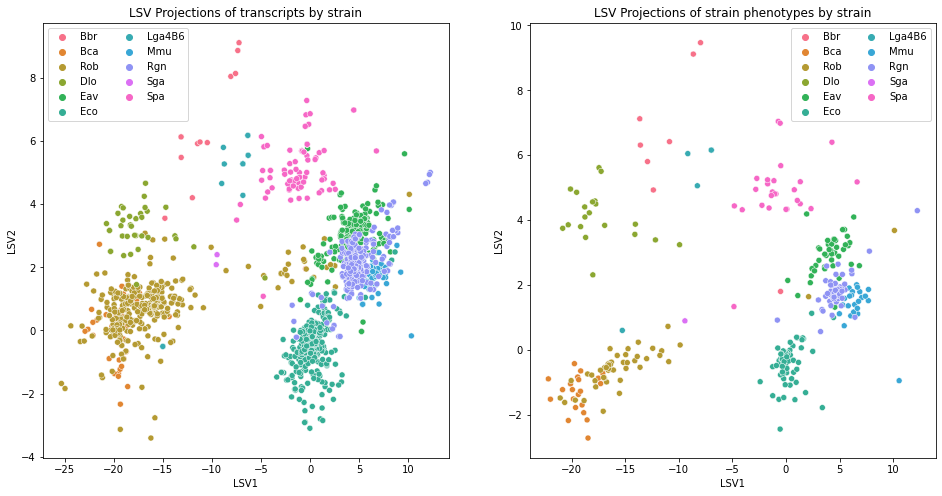

In [117]:
#Feature projections for transcripts and phenotypes by strain 
u_tr,s_tr,vh_tr = svd(bpm_filt_log_df)
u_pht,s_pht,vh_pht = svd(condensed_agg_log_df,full_matrices=True)
eigenvalues_tr = s_tr**2/(len(s_tr)-1)
expl_variance_tr = eigenvalues_tr / np.sum(eigenvalues_tr)
eigenvalues_pht = s_pht**2/(len(s_pht)-1)
expl_variance_pht = eigenvalues_pht / np.sum(eigenvalues_pht)
pc_indices = [0,1]
feature_projections_tr = sv_projections(bpm_filt_log_df,u_tr,s_tr,vh_tr,axis=1,pc_indices=pc_indices)
feature_projections_pht = sv_projections(condensed_agg_log_df,u_pht,s_pht,vh_pht,axis=1,pc_indices=pc_indices)

fp_tr = pd.DataFrame(data=feature_projections_tr.T,columns=["LSV1","LSV2"])
fp_tr.set_index(bpm_filt_log_df.columns,inplace=True)
fp_pht = pd.DataFrame(data=feature_projections_pht.T,columns=["LSV1","LSV2"])
fp_pht.set_index(condensed_agg_log_df.columns,inplace=True)


#Add in mcseed annotations for strain and phenotype
# fp_tr.loc[:,"Strain"] = mcseed_df.loc[fp_tr.index,"Isolate name"]
mcseed_filt = mcseed_df.loc[mcseed_df.index.isin(fp_tr.index),:]
fp_tr_mcseed_join = fp_tr.merge(right=mcseed_filt,left_index=True,right_index=True,sort=True)
fp_tr_mcseed = fp_tr_mcseed_join.loc[fp_tr.index].drop_duplicates()
# display(fp_tr_mcseed)

strain_palette = sns.color_palette("husl", len(fp_tr_mcseed["Isolate name"].unique()))
fig,axes = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = axes
sns.scatterplot(data=fp_tr_mcseed,x="LSV1",y="LSV2",ax=ax1,
                palette=strain_palette,hue="Isolate name")
handles,labels = ax1.get_legend_handles_labels()
abbrev_labels = [STRAIN_TAGS[l] for l in labels]
ax1.legend(handles,abbrev_labels,ncol=2)
ax1.set_title("LSV Projections of transcripts by strain")
#Display
# display(fp_tr)
# display(fp_pht)
fp_pht_mcseed = fp_pht.copy()
fp_pht_mcseed.loc[:,"Strain abbreviation"] = fp_pht_mcseed.index.str.extract("(\w+?)\_[\w\-]+",expand=False)
fp_pht_mcseed.loc[:,"Phenotype"] = fp_pht_mcseed.index.str.extract("\w+?\_([\w\-]+)",expand=False)
sns.scatterplot(data=fp_pht_mcseed,x="LSV1",y="LSV2",ax=ax2,
                palette=strain_palette,hue="Strain abbreviation")
handles,labels = ax2.get_legend_handles_labels()
ax2.legend(handles,labels,loc="best",ncol=2)
ax2.set_title("LSV Projections of strain phenotypes by strain")
plt.savefig("figures/feature_projections_SVD.png",dpi=200,bbox_inches="tight",facecolor="white")

,LSV1,LSV2,Strain abbreviation,Phenotype,Functional category
Bbr_Glc,-13.589456,6.311659,Bbr,Glc,Carbohydrate utilization
Bbr_Fuc,-10.873013,6.417420,Bbr,Fuc,Carbohydrate utilization
Bbr_Mal,-12.923767,5.803803,Bbr,Mal,Carbohydrate utilization
Bbr_Lnb,-8.648672,9.115360,Bbr,Lnb,Carbohydrate utilization
Bbr_GOS,-7.976719,9.466602,Bbr,GOS,Carbohydrate utilization
...,...,...,...,...,...
Spa_Acetate,-0.001836,4.331187,Spa,Acetate,Fermentation products
Spa_Formate,-1.053078,4.808698,Spa,Formate,Fermentation products
Spa_L-Lactate,1.054823,4.606790,Spa,L-Lactate,Fermentation products
Spa_Ethanol,-1.365979,4.758238,Spa,Ethanol,Fermentation products


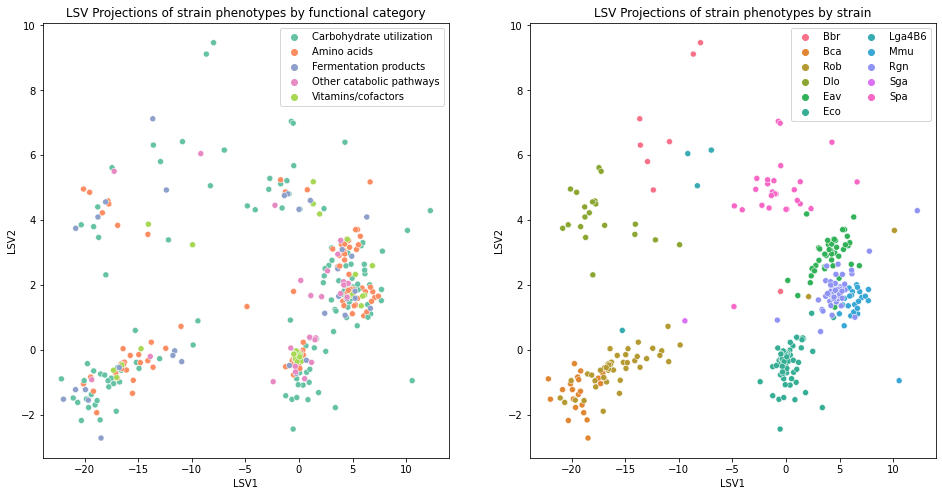

In [118]:
#Mapping pathways back to functional categories 
#Use mcseed_df (without list version phenotypes) for list of phenotype unique values 
pht_fc_dict = {}
for pht_str in mcseed_df["Phenotype"].unique(): #pht_str is a variable length semicolon separated string of different phenotypes
    pht_list = pht_str.split(";") 
    pht_str_rows = mcseed_df.loc[mcseed_df["Phenotype"]==pht_str,:]
    assert(len(pht_str_rows["Functional category"].unique()) == 1)
    fc_cat_str = pht_str_rows["Functional category"].iloc[0]
    fc_cat_list = fc_cat_str.split(";")
    for i,pht in enumerate(pht_list):
        if pht not in pht_fc_dict:
            if len(fc_cat_list) == 1: #If only one functional category for all entries in pht_str, use that category
                pht_fc_dict[pht] = fc_cat_list[0]
            elif len(fc_cat_list) == len(pht_list): #If one-to-one mapping of phenotypes to functional categories, go in order
                pht_fc_dict[pht] = fc_cat_list[i]
            else: #Not one-to-one mapping of phenotypes to functional categories; use some HARD CODING TM  
                print(pht_str)
                print(fc_cat_str)
                raise ValueError("Cannot automatically match phenotypes to functional categories based on prior entries")

fp_pht_mcseed.loc[:,"Functional category"] = fp_pht_mcseed["Phenotype"].map(pht_fc_dict)
display(fp_pht_mcseed)

n_fc_unique = len(fp_pht_mcseed["Functional category"].unique())
# fc_palette = sns.color_palette("husl", n_fc_unique)
fc_palette = sns.color_palette("Set2")[:n_fc_unique]
fig,axes = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = axes
#Strain phenotypes by functional category
sns.scatterplot(data=fp_pht_mcseed,x="LSV1",y="LSV2",ax=ax1,
                palette=fc_palette,hue="Functional category")
handles,labels = ax1.get_legend_handles_labels()
ax1.legend(handles,labels,loc="best")
ax1.set_title("LSV Projections of strain phenotypes by functional category")
#Strain phenotypes by strain
sns.scatterplot(data=fp_pht_mcseed,x="LSV1",y="LSV2",ax=ax2,
                palette=strain_palette,hue="Strain abbreviation")
handles,labels = ax2.get_legend_handles_labels()
ax2.legend(handles,labels,loc="best",ncol=2)
ax2.set_title("LSV Projections of strain phenotypes by strain")
plt.savefig("figures/feature_projections_SVD.png",dpi=200,bbox_inches="tight",facecolor="white")

plt.savefig("figures/phenotypes_functionalcategory_SVD.png",dpi=200,bbox_inches="tight",facecolor="white")


Explained Variance (Transcripts, first 2): [0.88122099 0.05033897]
Explained Variance (Phenotype, first 2): [0.87027742 0.0645283 ]
LSV1 Transcript
[-0.19782177 -0.16460693 -0.23249684 -0.2079506  -0.22424984 -0.17009461
 -0.25093267 -0.175674    0.34346986 -0.25963914  0.30228618  0.32797322
  0.25690156  0.3271902   0.32564538]
RSV1 Transcript
[-0.03566265 -0.02843822 -0.04016831 ... -0.0029157  -0.00370529
 -0.00565024]
-0.05060661595937954 0.015355517737189585
-0.10569920234684871 0.03249612828052281


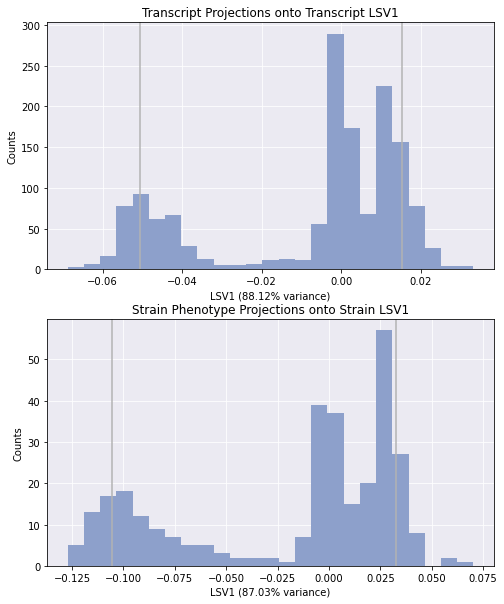

In [119]:
#SVD Feature Comparison 
u_tr,s_tr,vh_tr = svd(bpm_filt_log_df)
u_pht,s_pht,vh_pht = svd(condensed_agg_log_df,full_matrices=True)

#Explained variance calculated from s -> eigenvalues 
eigenvalues_tr = s_tr**2/(len(s_tr)-1)
expl_variance_tr = eigenvalues_tr / np.sum(eigenvalues_tr)
eigenvalues_pht = s_pht**2/(len(s_pht)-1)
expl_variance_pht = eigenvalues_pht / np.sum(eigenvalues_pht)

n_SV = 2
print("Explained Variance (Transcripts, first {0}): {1}".format(n_SV,expl_variance_tr[:n_SV]))
print("Explained Variance (Phenotype, first {0}): {1}".format(n_SV,expl_variance_pht[:n_SV]))

LSV1_tr = u_tr[:,0]
RSV1_tr = vh_tr[0,:]

print("LSV1 Transcript")
print(LSV1_tr)
print("RSV1 Transcript")
print(RSV1_tr)

LSV1_pht = u_pht[:,0]
RSV1_pht = vh_pht[0,:]

tr_10th, tr_90th = np.percentile(RSV1_tr,[10,90])
print(tr_10th,tr_90th)
pht_10th, pht_90th = np.percentile(RSV1_pht,[10,90])
print(pht_10th,pht_90th)
hist_color = sns.color_palette("Set2")[2]
vline_color = sns.color_palette("Set2")[7]
#Subplots and axes set up, grids, titles, x_labels with PC
fig,axes = plt.subplots(2,1,figsize=(8,10))
ax1,ax2 = axes
for ax in [ax1,ax2]:
    ax.grid(visible=True,color="white")
    ax.set_axisbelow(True)
    ax.set_facecolor("#EBEAF2")
    ax.set_ylabel("Counts")
ax1.set_title("Transcript Projections onto Transcript LSV1")
ax1.set_xlabel("LSV{0} ({1}% variance)".format(pc_indices[0]+1,
                                              "%.2f" % (expl_variance_tr[pc_indices[0]]*100)))
ax2.set_title("Strain Phenotype Projections onto Strain LSV1")
ax2.set_xlabel("LSV{0} ({1}% variance)".format(pc_indices[0]+1,
                                              "%.2f" % (expl_variance_pht[pc_indices[0]]*100)))
#Histogram and vline plotting for histogram 10th and 90th percentiles 
ax1.hist(RSV1_tr.flatten(),bins=25,color=hist_color)
ax1_ylim = ax1.get_ylim()
ax1.vlines([tr_10th,tr_90th],*ax1.get_ylim(),color=vline_color,linewidth=1.5)
ax1.set_ylim(ax1_ylim) #without this line vlines resets ylims for some reason - specific to using hist 
ax2.hist(RSV1_pht.flatten(),bins=25,color=hist_color)
ax2_ylim = ax2.get_ylim()
ax2.vlines([pht_10th,pht_90th],*ax2.get_ylim(),color=vline_color,linewidth=1.5)
ax2.set_ylim(ax2_ylim)

plt.savefig("figures/LSV1_projection_histogram.png",dpi=200,bbox_inches="tight",facecolor="white")

In [120]:
#Test cell - comparing s*SV (ie singular value weighted SVs) for PERMANOVA 
from scipy.spatial import distance_matrix
from skbio.stats import distance as sk_distance 
###Phenotypes###
u_pht,s_pht,vh_pht = svd(condensed_agg_log_df,full_matrices=True)
pc_indices = [0,1]
sample_projections = sv_projections(condensed_agg_log_df,u_pht,s_pht,vh_pht,pc_indices=pc_indices)
s_PCs = s_pht[pc_indices]
scaled_projections = np.dot(np.diag(s_PCs),sample_projections) #nPCs x n_samples

v1 = sample_projections.T #M vectors in K dimensions = n_samples x n_PCs
v2 = scaled_projections.T #n_samples x n_PCs
#permanova requires a skbio.stats.distance.DistanceMatrix object, must convert output  
sp_dm = sk_distance.DistanceMatrix(distance_matrix(v1,v1,p=2))
skpa = sk_distance.permanova(distance_matrix=sp_dm,grouping=sample_proj_df["arm"],permutations=100000)
display(skpa)

sp_dm_scaled = sk_distance.DistanceMatrix(distance_matrix(v2,v2,p=2))
skpa_scaled = sk_distance.permanova(distance_matrix=sp_dm_scaled,grouping=sample_proj_df["arm"],permutations=100000)
display(skpa_scaled)
###Transcripts###

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      15
number of groups                  2
test statistic            25.762256
p-value                     0.00138
number of permutations       100000
Name: PERMANOVA results, dtype: object

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      15
number of groups                  2
test statistic            31.297962
p-value                     0.00133
number of permutations       100000
Name: PERMANOVA results, dtype: object

In [ ]:
#HOSVD using log transformed transcript data, phenotype aggregated